# Ex7 - Model Regularization in Practice, an example with Keras and TensorFlow 2.0

In this task, you are going to see the differences between applying regularization vs. not applying, in terms of model training on some dataset.
The dataset we will use is Iris flowers, a classic SKLearn dataset.

Inspired by [BindiChen](https://github.com/BindiChen)

In [1]:
# Relevant imports
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

2022-03-20 10:10:35.541139: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-20 10:10:35.541193: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Exploring data

In [2]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Preparing data for Keras and TensorFlow

In [4]:
# label -> one-hot encoding, doing so because we are in a classification problem
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
# drop old label
df.drop(['label'], axis=1, inplace=True)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [6]:
# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [7]:
# TODO: Split the data set in a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


## 1. Build an unregularized neural network model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# TODO: Build the architecture below:
# Sequential of:
# Dense of 64 neurons, with input shape (4,), activation = relu
# Dense of 128 neurons,activation = relu
# Dense of 128 neurons,activation = relu
# Dense of 128 neurons,activation = relu
# Dense of 64 neurons, activation = relu
# Dense of 64 neurons, activation = relu
# Dense of 64 neurons, activation = relu
# Dense of 3 neurons, activation = softmax for the classification task
# TODO: make sure to return the model from that function

def create_model():
    model = Sequential([Dense(64, activation='relu', input_shape=(4,)),
                       Dense(128, activation='relu'),
                       Dense(128, activation='relu'),
                       Dense(128, activation='relu'),
                       Dense(64, activation='relu'),
                       Dense(64, activation='relu'),
                       Dense(64, activation='relu'),
                       Dense(3, activation='softmax')])
    return model

In [10]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4

2022-03-20 10:10:39.322754: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-20 10:10:39.322799: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-20 10:10:39.322830: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (driver): /proc/driver/nvidia/version does not exist
2022-03-20 10:10:39.323197: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Compile the model


In [11]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=('accuracy')
    ### TODO: Compile with adam optimizer, categorical cross entropy loss, 'accuracy' as metric
)

### Fit the model to the training data

In [12]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 1s - loss: 1.0948 - accuracy: 0.5000 - val_loss: 1.0057 - val_accuracy: 0.7000 - 1s/epoch - 459ms/step
Epoch 2/200
3/3 - 0s - loss: 0.9919 - accuracy: 0.6778 - val_loss: 0.9341 - val_accuracy: 0.6667 - 58ms/epoch - 19ms/step
Epoch 3/200
3/3 - 0s - loss: 0.9380 - accuracy: 0.6556 - val_loss: 0.8013 - val_accuracy: 0.6667 - 49ms/epoch - 16ms/step
Epoch 4/200
3/3 - 0s - loss: 0.7980 - accuracy: 0.6556 - val_loss: 0.6747 - val_accuracy: 0.6667 - 45ms/epoch - 15ms/step
Epoch 5/200
3/3 - 0s - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.5733 - val_accuracy: 0.8667 - 48ms/epoch - 16ms/step
Epoch 6/200
3/3 - 0s - loss: 0.5958 - accuracy: 0.7556 - val_loss: 0.5012 - val_accuracy: 0.6667 - 45ms/epoch - 15ms/step
Epoch 7/200
3/3 - 0s - loss: 0.5348 - accuracy: 0.6556 - val_loss: 0.4555 - val_accuracy: 0.7667 - 47ms/epoch - 16ms/step
Epoch 8/200
3/3 - 0s - loss: 0.5062 - accuracy: 0.7222 - val_loss: 0.4174 - val_accuracy: 0.9667 - 48ms/epoch - 16ms/step
Epoch 9/200
3/3 - 0s - lo

Epoch 68/200
3/3 - 0s - loss: 0.0839 - accuracy: 0.9778 - val_loss: 0.0868 - val_accuracy: 0.9667 - 32ms/epoch - 11ms/step
Epoch 69/200
3/3 - 0s - loss: 0.0823 - accuracy: 0.9778 - val_loss: 0.1143 - val_accuracy: 0.9333 - 33ms/epoch - 11ms/step
Epoch 70/200
3/3 - 0s - loss: 0.1021 - accuracy: 0.9556 - val_loss: 0.1346 - val_accuracy: 0.9333 - 38ms/epoch - 13ms/step
Epoch 71/200
3/3 - 0s - loss: 0.1834 - accuracy: 0.9222 - val_loss: 0.2093 - val_accuracy: 0.9333 - 36ms/epoch - 12ms/step
Epoch 72/200
3/3 - 0s - loss: 0.1349 - accuracy: 0.9556 - val_loss: 0.4757 - val_accuracy: 0.9000 - 34ms/epoch - 11ms/step
Epoch 73/200
3/3 - 0s - loss: 0.3085 - accuracy: 0.8667 - val_loss: 0.1184 - val_accuracy: 0.9333 - 32ms/epoch - 11ms/step
Epoch 74/200
3/3 - 0s - loss: 0.1550 - accuracy: 0.9222 - val_loss: 0.1563 - val_accuracy: 0.9333 - 37ms/epoch - 12ms/step
Epoch 75/200
3/3 - 0s - loss: 0.1448 - accuracy: 0.9333 - val_loss: 0.1778 - val_accuracy: 0.9000 - 33ms/epoch - 11ms/step
Epoch 76/200
3/3

Epoch 135/200
3/3 - 0s - loss: 0.0704 - accuracy: 0.9778 - val_loss: 0.1322 - val_accuracy: 0.9333 - 36ms/epoch - 12ms/step
Epoch 136/200
3/3 - 0s - loss: 0.0855 - accuracy: 0.9556 - val_loss: 0.1009 - val_accuracy: 0.9667 - 34ms/epoch - 11ms/step
Epoch 137/200
3/3 - 0s - loss: 0.1100 - accuracy: 0.9556 - val_loss: 0.1659 - val_accuracy: 0.9333 - 31ms/epoch - 10ms/step
Epoch 138/200
3/3 - 0s - loss: 0.1151 - accuracy: 0.9556 - val_loss: 0.0876 - val_accuracy: 0.9333 - 49ms/epoch - 16ms/step
Epoch 139/200
3/3 - 0s - loss: 0.0981 - accuracy: 0.9333 - val_loss: 0.0945 - val_accuracy: 0.9333 - 34ms/epoch - 11ms/step
Epoch 140/200
3/3 - 0s - loss: 0.0703 - accuracy: 0.9778 - val_loss: 0.0759 - val_accuracy: 0.9667 - 33ms/epoch - 11ms/step
Epoch 141/200
3/3 - 0s - loss: 0.0703 - accuracy: 0.9778 - val_loss: 0.0762 - val_accuracy: 0.9667 - 33ms/epoch - 11ms/step
Epoch 142/200
3/3 - 0s - loss: 0.0699 - accuracy: 0.9778 - val_loss: 0.0768 - val_accuracy: 0.9667 - 33ms/epoch - 11ms/step
Epoch 14

### Model Evaluation

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

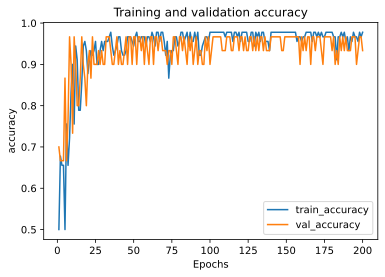

In [14]:
plot_metric(history, 'accuracy')


### TODO: Q: what is the name of this phenomena?

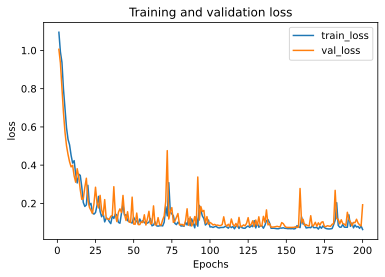

In [15]:
plot_metric(history, 'loss')

Plot the training and validation loss

Finally, let's plot the loss vs. epochs graph on the training and validation sets

From the graph, we can see that the model has vastly overfit the training data, so it outperform the validation set


In [16]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0846 - accuracy: 0.9667 - 21ms/epoch - 21ms/step


[0.08462801575660706, 0.9666666388511658]

## 2. Adding L2 regularization and Dropout

In [17]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

### TODO:
### You should build the same model as above, but this time:
# 1. Dropout layer, with rate should follow each Dense layer, except the last one (Dense of 3)
# 2.factor should be the input of l2 regularization in each Dense layer
# 3. Don't forget to return the model
# kernel_regularizer=regularizers.l2(0.01)
def create_regularized_model(factor, rate):
    model = Sequential([Dense(64, activation='relu', input_shape=(4,), kernel_regularizer=l2(factor)),
                       Dropout(rate),
                       Dense(128, activation='relu', kernel_regularizer=l2(factor)),
                       Dropout(rate),
                       Dense(128, activation='relu', kernel_regularizer=l2(factor)),
                       Dropout(rate),
                       Dense(128, activation='relu', kernel_regularizer=l2(factor)),
                       Dropout(rate),
                       Dense(64, activation='relu', kernel_regularizer=l2(factor)),
                       Dropout(rate),
                       Dense(64, activation='relu', kernel_regularizer=l2(factor)),
                       Dropout(rate),
                       Dense(64, activation='relu', kernel_regularizer=l2(factor)),
                       Dropout(rate),
                       Dense(3, activation='softmax', kernel_regularizer=l2(factor))])
    return model

In [18]:
# Re-build the model with weight decay and dropout layers
model = create_regularized_model(1e-5, 0.3)

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                320       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 128)              

In [20]:
# Compile the model
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=('accuracy')
    ### TODO: Compile with adam optimizer, categorical cross entropy loss, 'accuracy' as metric
)

In [21]:
# Train the model, with some of the data reserved for validation
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 1s - loss: 1.1839 - accuracy: 0.3556 - val_loss: 1.1220 - val_accuracy: 0.3000 - 1s/epoch - 364ms/step
Epoch 2/200
3/3 - 0s - loss: 1.1647 - accuracy: 0.3556 - val_loss: 1.1158 - val_accuracy: 0.2000 - 32ms/epoch - 11ms/step
Epoch 3/200
3/3 - 0s - loss: 1.1303 - accuracy: 0.2222 - val_loss: 1.1125 - val_accuracy: 0.3333 - 34ms/epoch - 11ms/step
Epoch 4/200
3/3 - 0s - loss: 1.1340 - accuracy: 0.2889 - val_loss: 1.1054 - val_accuracy: 0.3333 - 33ms/epoch - 11ms/step
Epoch 5/200
3/3 - 0s - loss: 1.1326 - accuracy: 0.2556 - val_loss: 1.0982 - val_accuracy: 0.3333 - 33ms/epoch - 11ms/step
Epoch 6/200
3/3 - 0s - loss: 1.0695 - accuracy: 0.4000 - val_loss: 1.0909 - val_accuracy: 0.3333 - 57ms/epoch - 19ms/step
Epoch 7/200
3/3 - 0s - loss: 1.0941 - accuracy: 0.3667 - val_loss: 1.0814 - val_accuracy: 0.3333 - 58ms/epoch - 19ms/step
Epoch 8/200
3/3 - 0s - loss: 1.0832 - accuracy: 0.3111 - val_loss: 1.0797 - val_accuracy: 0.3333 - 40ms/epoch - 13ms/step
Epoch 9/200
3/3 - 0s - lo

Epoch 68/200
3/3 - 0s - loss: 0.4781 - accuracy: 0.7333 - val_loss: 0.4209 - val_accuracy: 0.9333 - 34ms/epoch - 11ms/step
Epoch 69/200
3/3 - 0s - loss: 0.4828 - accuracy: 0.7000 - val_loss: 0.4213 - val_accuracy: 0.9667 - 34ms/epoch - 11ms/step
Epoch 70/200
3/3 - 0s - loss: 0.4704 - accuracy: 0.7667 - val_loss: 0.4222 - val_accuracy: 0.9667 - 33ms/epoch - 11ms/step
Epoch 71/200
3/3 - 0s - loss: 0.4707 - accuracy: 0.8111 - val_loss: 0.4199 - val_accuracy: 1.0000 - 31ms/epoch - 10ms/step
Epoch 72/200
3/3 - 0s - loss: 0.4868 - accuracy: 0.7333 - val_loss: 0.4162 - val_accuracy: 0.9333 - 53ms/epoch - 18ms/step
Epoch 73/200
3/3 - 0s - loss: 0.4572 - accuracy: 0.7556 - val_loss: 0.4112 - val_accuracy: 0.9333 - 35ms/epoch - 12ms/step
Epoch 74/200
3/3 - 0s - loss: 0.4469 - accuracy: 0.7444 - val_loss: 0.4053 - val_accuracy: 0.9000 - 39ms/epoch - 13ms/step
Epoch 75/200
3/3 - 0s - loss: 0.4460 - accuracy: 0.7556 - val_loss: 0.3987 - val_accuracy: 0.8000 - 33ms/epoch - 11ms/step
Epoch 76/200
3/3

Epoch 135/200
3/3 - 0s - loss: 0.2416 - accuracy: 0.9333 - val_loss: 0.1215 - val_accuracy: 0.9667 - 34ms/epoch - 11ms/step
Epoch 136/200
3/3 - 0s - loss: 0.2056 - accuracy: 0.9444 - val_loss: 0.1086 - val_accuracy: 0.9667 - 34ms/epoch - 11ms/step
Epoch 137/200
3/3 - 0s - loss: 0.2562 - accuracy: 0.9111 - val_loss: 0.1695 - val_accuracy: 0.9333 - 33ms/epoch - 11ms/step
Epoch 138/200
3/3 - 0s - loss: 0.2625 - accuracy: 0.9000 - val_loss: 0.2477 - val_accuracy: 0.9000 - 34ms/epoch - 11ms/step
Epoch 139/200
3/3 - 0s - loss: 0.3053 - accuracy: 0.8444 - val_loss: 0.1222 - val_accuracy: 0.9333 - 54ms/epoch - 18ms/step
Epoch 140/200
3/3 - 0s - loss: 0.3315 - accuracy: 0.8778 - val_loss: 0.1165 - val_accuracy: 0.9333 - 37ms/epoch - 12ms/step
Epoch 141/200
3/3 - 0s - loss: 0.2152 - accuracy: 0.9667 - val_loss: 0.1509 - val_accuracy: 0.9333 - 34ms/epoch - 11ms/step
Epoch 142/200
3/3 - 0s - loss: 0.3149 - accuracy: 0.8889 - val_loss: 0.1304 - val_accuracy: 0.9333 - 34ms/epoch - 11ms/step
Epoch 14

### Plot the learning curves

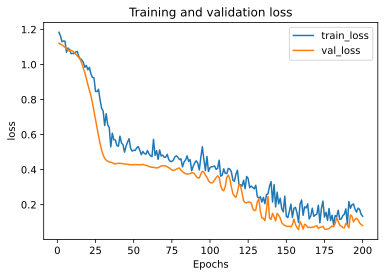

In [22]:
plot_metric(history, 'loss')

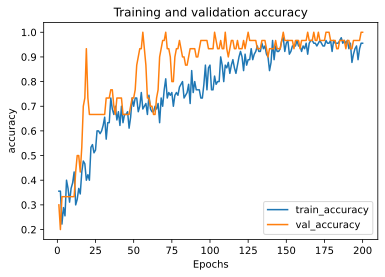

In [23]:
plot_metric(history, 'accuracy')

Here, you can see that the overfitting is not completely fixed, but there is a signficant improvement when we compare it to the unregularized model

In [24]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0704 - accuracy: 1.0000 - 19ms/epoch - 19ms/step


[0.07036321610212326, 1.0]

## That's it

Now you can see how regularization can be used and will help within the mentioned phenomena, which we discussed in class.

